# [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is relplot(). This is a [figure-level function](https://seaborn.pydata.org/introduction.html#intro-func-types) for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) with one of two axes-level functions:

- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

In [1]:
import pandas as pd, numpy as np, copy, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

## Relating variables with scatter plots

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. 
The most basic, which should be used when both variables are numeric, is the scatterplot() function. 
In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. 
The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

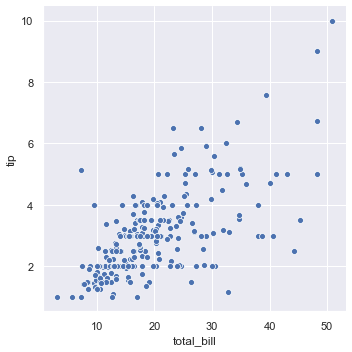

In [2]:
tips = sns.load_dataset("tips")
fig = sns.relplot(x="total_bill", y="tip", data=tips);

While the points are plotted in two dimensions, 
another dimension can be added to the plot by coloring the points according to a third variable. 
In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

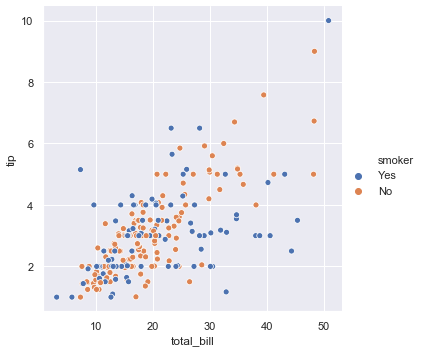

In [3]:
tips = sns.load_dataset("tips")
fig = sns.relplot(x="total_bill", y="tip", hue='smoker', data=tips);

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

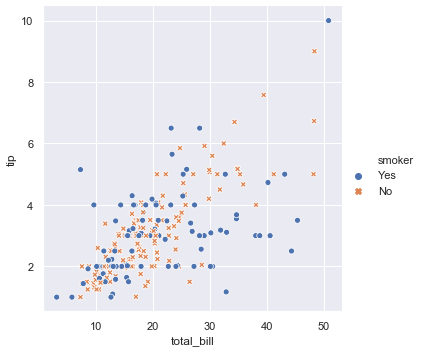

In [4]:
tips = sns.load_dataset("tips")
fig = sns.relplot(x="total_bill", y="tip", hue='smoker', style='smoker', data=tips);

It’s also possible to represent four variables by changing the hue and style of each point independently. 
But this should be done carefully, because the eye is much less sensitive to shape than to color:

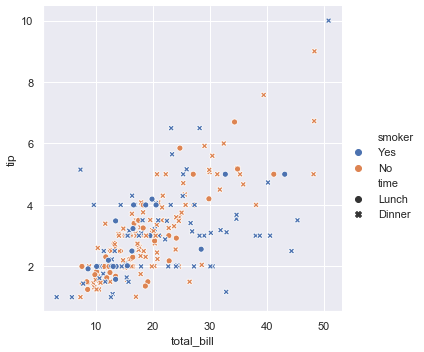

In [5]:
tips = sns.load_dataset("tips")
fig = sns.relplot(x="total_bill", y="tip", hue='smoker', style='time', data=tips);

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. 
If the hue semantic is numeric (specifically, if it can be cast to float), 
the default coloring switches to a sequential palette:

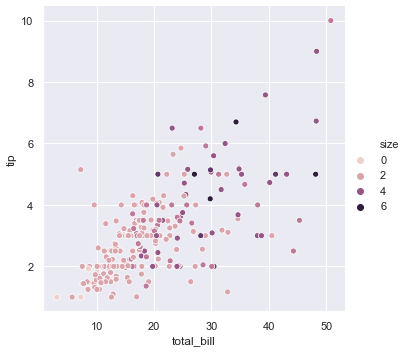

In [6]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

In both cases, you can customize the color palette. There are many options for doing so. 
Here, we customize a sequential palette using the string interface to cubehelix_palette():

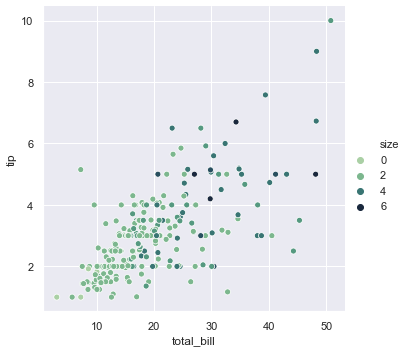

In [7]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

The third kind of semantic variable changes the size of each point:

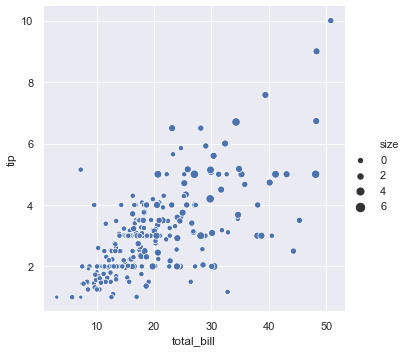

In [8]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

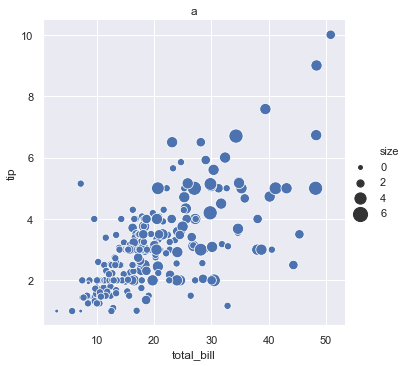

In [40]:
tips = sns.load_dataset("tips")
fig = sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);
for ax in fig.axes.flatten():
    ax.set_title('a')